<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tanggal      300 non-null    object
 1   Produk       300 non-null    object
 2   Region       300 non-null    object
 3   Channel      300 non-null    object
 4   Qty Terjual  300 non-null    int64 
 5   Net Sales    300 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


C:\Users\BERNADUSBOLI\AppData\Local\Temp\ipykernel_23064\62538241.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Tanggal'] = pd.to_datetime(df['Tanggal'])
C:\Users\BERNADUSBOLI\AppData\Local\Temp\ipykernel_23064\62538241.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='Region', y='Qty Terjual', estimator=sum, ci=None)


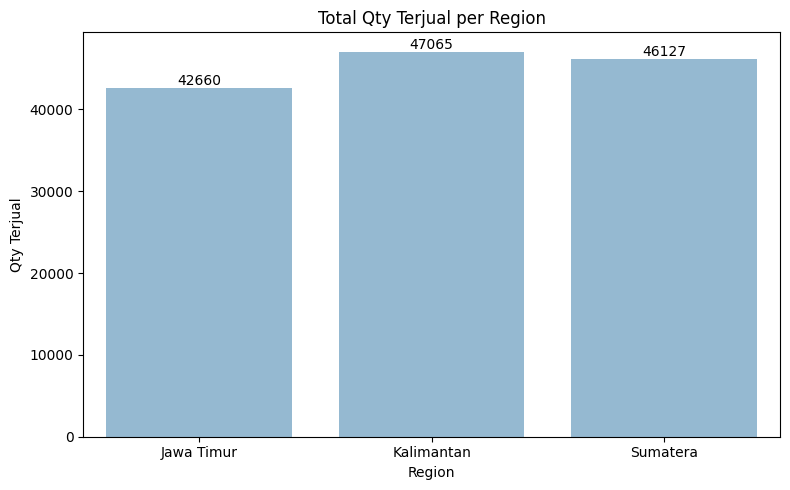

<Figure size 640x480 with 0 Axes>

In [13]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan grafik langsung di notebook
%matplotlib inline

# Load data
df = pd.read_csv('../data/SoKlin_SalesData.csv')

# Tampilkan 5 baris pertama
df.head()

# Info struktur data
df.info()

# Cek ringkasan statistik numerik
df.describe()
#  Konversi Kolom Tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Kolom Bulan (untuk time series ke depan)
df['Bulan'] = df['Tanggal'].dt.to_period('M').astype(str)

# Sorting batang (dari tertinggi ke terendah)
df_sorted = df.groupby('Region', as_index=False)['Qty Terjual'].sum().sort_values('Qty Terjual', ascending=False)

# Visualisasi total Qty Terjual per Region
sns.set_palette("Blues_d")
plt.figure(figsize=(8,5))

ax = sns.barplot(data=df, x='Region', y='Qty Terjual', estimator=sum, ci=None)
ax.set_title('Total Qty Terjual per Region')
ax.set_xlabel('Region')
ax.set_ylabel('Qty Terjual')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # tanpa desimal
plt.tight_layout()
plt.show()
plt.savefig('../output/qty_terjual_per_region.png', dpi=300)



